In [1]:
import sys

import torch
import matplotlib.pyplot as plt

sys.path.append("../")
from src import create_hf_train_dataset

In [2]:
data_dir = "../data"

In [3]:
hf_dataset_dict = create_hf_train_dataset(data_dir)
hf_train_dataset = hf_dataset_dict["train"]

In [4]:
labels = torch.tensor(hf_train_dataset["label"])

**Look at Class Distribution**

In [5]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

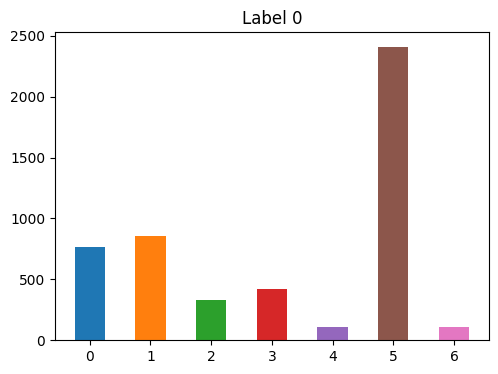

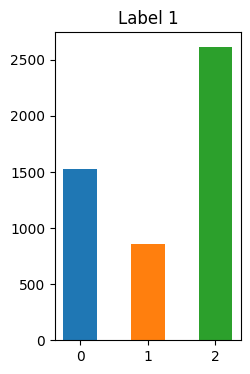

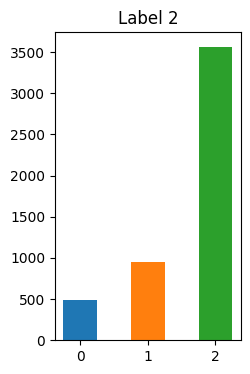

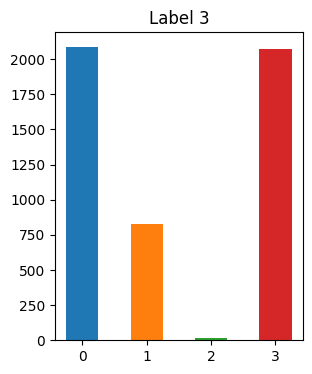

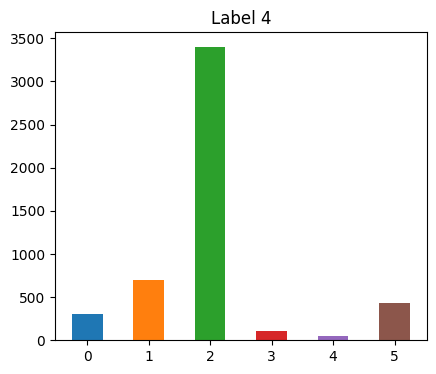

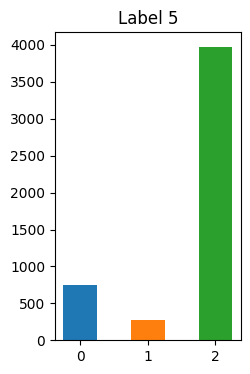

In [6]:
for i in range(labels.size(1)):
    label = labels[:, i]
    class_counts = torch.bincount(label)
    plt.figure(figsize=(len(class_counts) * 0.8, 4))
    plt.bar(list(range(len(class_counts))), class_counts, color=colors, width=0.5)
    plt.title(f"Label {i}")
    plt.show()

**Computing Class Weights**

In [7]:
for i in range(labels.size(1)):
    label = labels[:, i]
    class_counts = torch.bincount(label)
    class_frequencies = class_counts.float() / len(label)
    weights = 1. / class_frequencies
    weights = weights / weights.sum() * len(class_counts)
    
    print(f"Class weights for label {i}: {weights.tolist()}")

Class weights for label 0: [0.3393157720565796, 0.3055035471916199, 0.7802231311798096, 0.6175225973129272, 2.390775442123413, 0.10822031646966934, 2.4584388732910156]
Class weights for label 1: [0.8957281708717346, 1.5825916528701782, 0.5216802954673767]
Class weights for label 2: [1.817978858947754, 0.9328850507736206, 0.2491360902786255]
Class weights for label 3: [0.03498854860663414, 0.08836092054843903, 3.841374635696411, 0.03527603670954704]
Class weights for label 4: [0.5148215889930725, 0.22734284400939941, 0.04695342481136322, 1.5199494361877441, 3.3248891830444336, 0.3660428524017334]
Class weights for label 5: [0.7745617032051086, 2.079379081726074, 0.1460590958595276]
